# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [2]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print (df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [5]:
# frequency table for prestige and whether or not someone was admitted
pd.crosstab(df.prestige, df.admit)

admit,0,1
prestige,,
1.0,28,33
2.0,95,53
3.0,93,28
4.0,55,12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [3]:
cols_to_keep = ['admit','gre','gpa']
ranks = pd.get_dummies(df.prestige, prefix = 'prestige')
model_df = df[cols_to_keep].join(ranks)
model_df.head()


,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


#### 2.2 When modeling our class variables, how many do we need? 



Answer: 3

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [14]:
#crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
pd.crosstab(model_df['prestige_1.0'],model_df.admit)

admit,0,1
prestige_1.0,,
0,243,93
1,28,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [6]:
oddsp1 = 33/28
oddsp1

1.1785714285714286

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [7]:
oddsp0 = 93/243
oddsp0

0.38271604938271603

#### 3.3 Calculate the odds ratio

In [8]:
OR = oddsp1/oddsp0
OR

3.079493087557604

#### 3.4 Write this finding in a sentenance: 

Answer: If you went to a prestige_1 college the odds are in your favour for being admitted to university (1.17) and the probability is 54%. For those who didn't go to a prestige 1 college the odds of getting into uni is 0.38 and the probability is only 28%.

The odds ratio tells us that your 3 times more likely to be admitted if you went to a Prestige 1 college than if you didn't.

#### 3.5 Print the cross tab for prestige_4

In [58]:
pd.crosstab(model_df['prestige_4.0'],model_df.admit)

admit,0,1
prestige_4.0,,
0,216,114
1,55,12


#### 3.6 Calculate the OR 

In [10]:
oddsp1 = 12/55
oddsp0 = 114/216
OR = oddsp1/oddsp0
print('prestige_4.0 ',oddsp1, oddsp0, OR)

prestige_4.0  0.21818181818181817 0.5277777777777778 0.4133971291866028


#### 3.7 Write this finding in a sentence

Answer: Going to a prestige_4 college means you are 60% less likely to be  admitted.

## Part 4. Analysis

In [5]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = model_df[cols_to_keep].join(ranks.ix[:, 'prestige_2':])
data.head()

,admit,gre,gpa,prestige_2.0,prestige_3.0,prestige_4.0,intercept
0,0,380.0,3.61,0,1,0,1.0
1,1,660.0,3.67,0,1,0,1.0
2,1,800.0,4.00,0,0,0,1.0
3,1,640.0,3.19,0,0,1,1.0
4,0,520.0,2.93,0,0,1,1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [16]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [6]:
train_cols = ['gre','gpa','prestige_2.0', 'prestige_3.0', 'prestige_4.0', 'intercept']

#### 4.2 Fit the model

In [7]:
import statsmodels.api as sm
logit = sm.Logit(data['admit'],data[train_cols])
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


#### 4.3 Print the summary results

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Tue, 18 Apr 2017   Pseudo R-squ.:                 0.08166
Time:                        10:10:10   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.146      0.032        -1.301    -0.059
prestige_3.0    -1.3387      0.345     -3.882      0.000        -2.015    -0.663
prestige_4.0    -1.5534      0.417     -3.721      0.000        -2.372    -0.735
intercept       -3.8769      1.142     -3.393      0.001        -6.116    -1.638
================================================================================
"""

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [9]:
import numpy as np
#Don't know how to calc 95% confidence intervals
conf = result.conf_int()
conf['OR'] = result.params
conf.columns = ['2.5%', '97.5%', 'OR']
print(np.exp(conf))

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: You're 50% less likely to be admitted to university if you attended a prestige 2 college.

#### 4.6 Interpret the OR of GPA

Answer:  As GPA increases by one unit the odds of you being admitted increases 2 fold.

admit
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: gpa, dtype: object

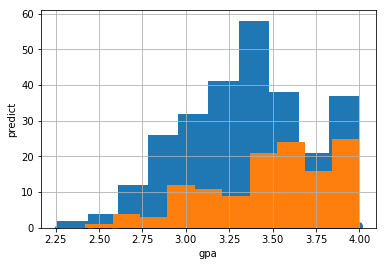

In [10]:
data['predict'] = result.predict(data[train_cols])
data.plot(x='gpa', y='predict', kind='scatter')
data.groupby('admit').gpa.hist()

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [11]:
def xrange(x,y): # manually create xrange as it doesn't exist in python 3
    return iter(range(x,y))

def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [12]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print (gres)
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print (gpas)
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:47: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


#### 5.1 Recreate the dummy variables

In [38]:
combos.columns = ['gre','gpa','prestige','intercept'] #rename columns

# recreate the dummy variables
dummy_ranks = pd.get_dummies(combos['prestige'],prefix ='prestige')

# keep only what we need for making predictions
cols_to_keep = ['gre','gpa','intercept']
test_mod = combos[cols_to_keep].join(dummy_ranks.ix[:,'prestige_2':])

#### 5.2 Make predictions on the enumerated dataset

In [39]:
test_mod['predict'] = result.predict(test_mod)
combos['predict'] = result.predict(test_mod)

In [20]:
test_mod.tail(4)

,gre,gpa,intercept,prestige_2.0,prestige_3.0,prestige_4.0,predict
396,800.0,4.0,1.0,0,0,0,0.985399
397,800.0,4.0,1.0,1,0,0,0.946509
398,800.0,4.0,1.0,0,1,0,0.934534
399,800.0,4.0,1.0,0,0,1,0.582995


#### 5.3 Interpret findings for the last 4 observations

Answer: the last 4 observations each have gre of 800 and gpa of 4, therefore it is the prestige rank is affectinng the probability of being admitted. As expected, the first of the observations which attended a rank 1 college has the highest probability (64%) of being admitted.  The last observation attended the 4th ranked college and thus has the lowest probability, of 21%.

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

In [42]:
combos.head()

,gre,gpa,prestige,intercept,predict
0,220.0,2.260000,1.0,1.0,0.827672
1,220.0,2.260000,2.0,1.0,0.557380
2,220.0,2.260000,3.0,1.0,0.503951
3,220.0,2.260000,4.0,1.0,0.090492
4,220.0,2.453333,1.0,1.0,0.848114


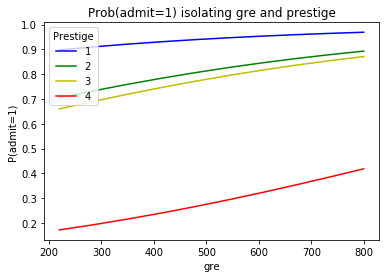

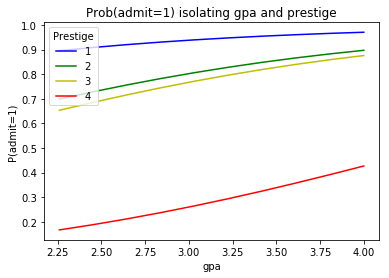

In [54]:
# isolate gre and class rank
def isolate_and_plot(variable):
    grouped = pd.pivot_table(combos, values=['predict'], index=[variable, 'prestige'],aggfunc=np.mean)
    
    colors = 'rbgyrbgy'# make a plot
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['predict'], color=colors[int(col)])
        
    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and prestige")

    pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')